In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import sklearn 
import tkinter as tk
from flask import Flask
from  dotenv import dotenv_values
import pyodbc


In [43]:
# Load the datasets
df_train = pd.read_csv("F:\\school\\Azubi Africa\\P5-ML-API\\data\\Paitients_Files_Train.csv")
df_test = pd.read_csv("F:\\school\\Azubi Africa\\P5-ML-API\\data\\Paitients_Files_Test.csv")


In [44]:
# Display initial information about the datasets
print("Train Dataset:")
print(df_train.head())
print(df_train.info())
print(df_train.columns)

print("\nTest Dataset:")
print(df_test.head())
print(df_test.info())
print(df_test.columns)


Train Dataset:
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null  

In [45]:
# Data Cleaning

# Function to clean dataset
def clean_dataset(df):
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    # Handle missing values
    df.fillna(df.mean(), inplace=True)
    
    # Convert 'Age' to integer
    df['Age'] = df['Age'].astype(int)
    
    # Convert 'Insurance' to boolean
    df['Insurance'] = df['Insurance'].astype(bool)
    
    return df


In [46]:
def clean_dataset(df):
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    
    # Handle missing values
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Fill numeric columns with mean
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    # Fill categorical columns with mode
    for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Convert 'Age' to integer (if it exists and is numeric)
    if 'Age' in df.columns and df['Age'].dtype in ['int64', 'float64']:
        df['Age'] = df['Age'].astype(int)
    
    return df

# Clean both datasets
df_train_cleaned = clean_dataset(df_train.copy())
df_test_cleaned = clean_dataset(df_test.copy())


C:\Users\MoseS\AppData\Local\Temp\ipykernel_15804\1793656851.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\MoseS\AppData\Local\Temp\ipykernel_15804\1793656851.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [47]:
# Display info after cleaning
print("\nTrain Dataset after cleaning:")
print(df_train_cleaned.info())

print("\nTest Dataset after cleaning:")
print(df_test_cleaned.info())



Train Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB
None

Test Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 n

In [48]:
# Save cleaned datasets
df_train_cleaned.to_csv('cleaned_train_dataset.csv', index=False)
df_test_cleaned.to_csv('cleaned_test_dataset.csv', index=False)


In [49]:
# Exploratory Data Analysis (EDA)

# Function for EDA
def perform_eda(df, title):
    print(f"\nExploratory Data Analysis for {title} Dataset:")
    
    # Numerical variables distribution
    for col in df.select_dtypes(include=[np.number]).columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} - {title}')
        plt.show()
    
    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap - {title}')
    plt.show()
    
    # Pairplot for numerical variables
    sns.pairplot(df)
    plt.suptitle(f'Pairplot - {title}', y=1.02)
    plt.show()
    
    # Boxplot for numerical variables
    df.boxplot(figsize=(12, 6))
    plt.title(f'Boxplot of Numerical Variables - {title}')
    plt.xticks(rotation=90)
    plt.show()
    
    # Categorical variables distribution
    for col in df.select_dtypes(include=['object', 'bool']).columns:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col} - {title}')
        plt.show()


In [50]:
import pandas as pd

# Function to clean the column by converting numeric-like strings to floats
def clean_column(column):
    def convert_to_float(value):
        try:
            return float(value)
        except ValueError:
            return None  # Replace non-numeric values with None (or NaN)

    return column.apply(convert_to_float)

# Example data
data_train = {'Column1': [1.0, 2.0, 'ICU200010', 4.0]}
data_test = {'Column1': [5.0, 6.0, 7.0, 'ICU200010']}

df_train_cleaned = pd.DataFrame(data_train)
df_test_cleaned = pd.DataFrame(data_test)

# Clean the datasets
df_train_cleaned['Column1'] = clean_column(df_train_cleaned['Column1'])
df_test_cleaned['Column1'] = clean_column(df_test_cleaned['Column1'])

# Function to perform EDA
def perform_eda(df, dataset_name):
    print(f"Performing EDA on {dataset_name} dataset")
    print(df.describe())


In [51]:
# Perform EDA on both datasets
perform_eda(df_train_cleaned, 'Train')
perform_eda(df_test_cleaned, 'Test')

Performing EDA on Train dataset
        Column1
count  3.000000
mean   2.333333
std    1.527525
min    1.000000
25%    1.500000
50%    2.000000
75%    3.000000
max    4.000000
Performing EDA on Test dataset
       Column1
count      3.0
mean       6.0
std        1.0
min        5.0
25%        5.5
50%        6.0
75%        6.5
max        7.0


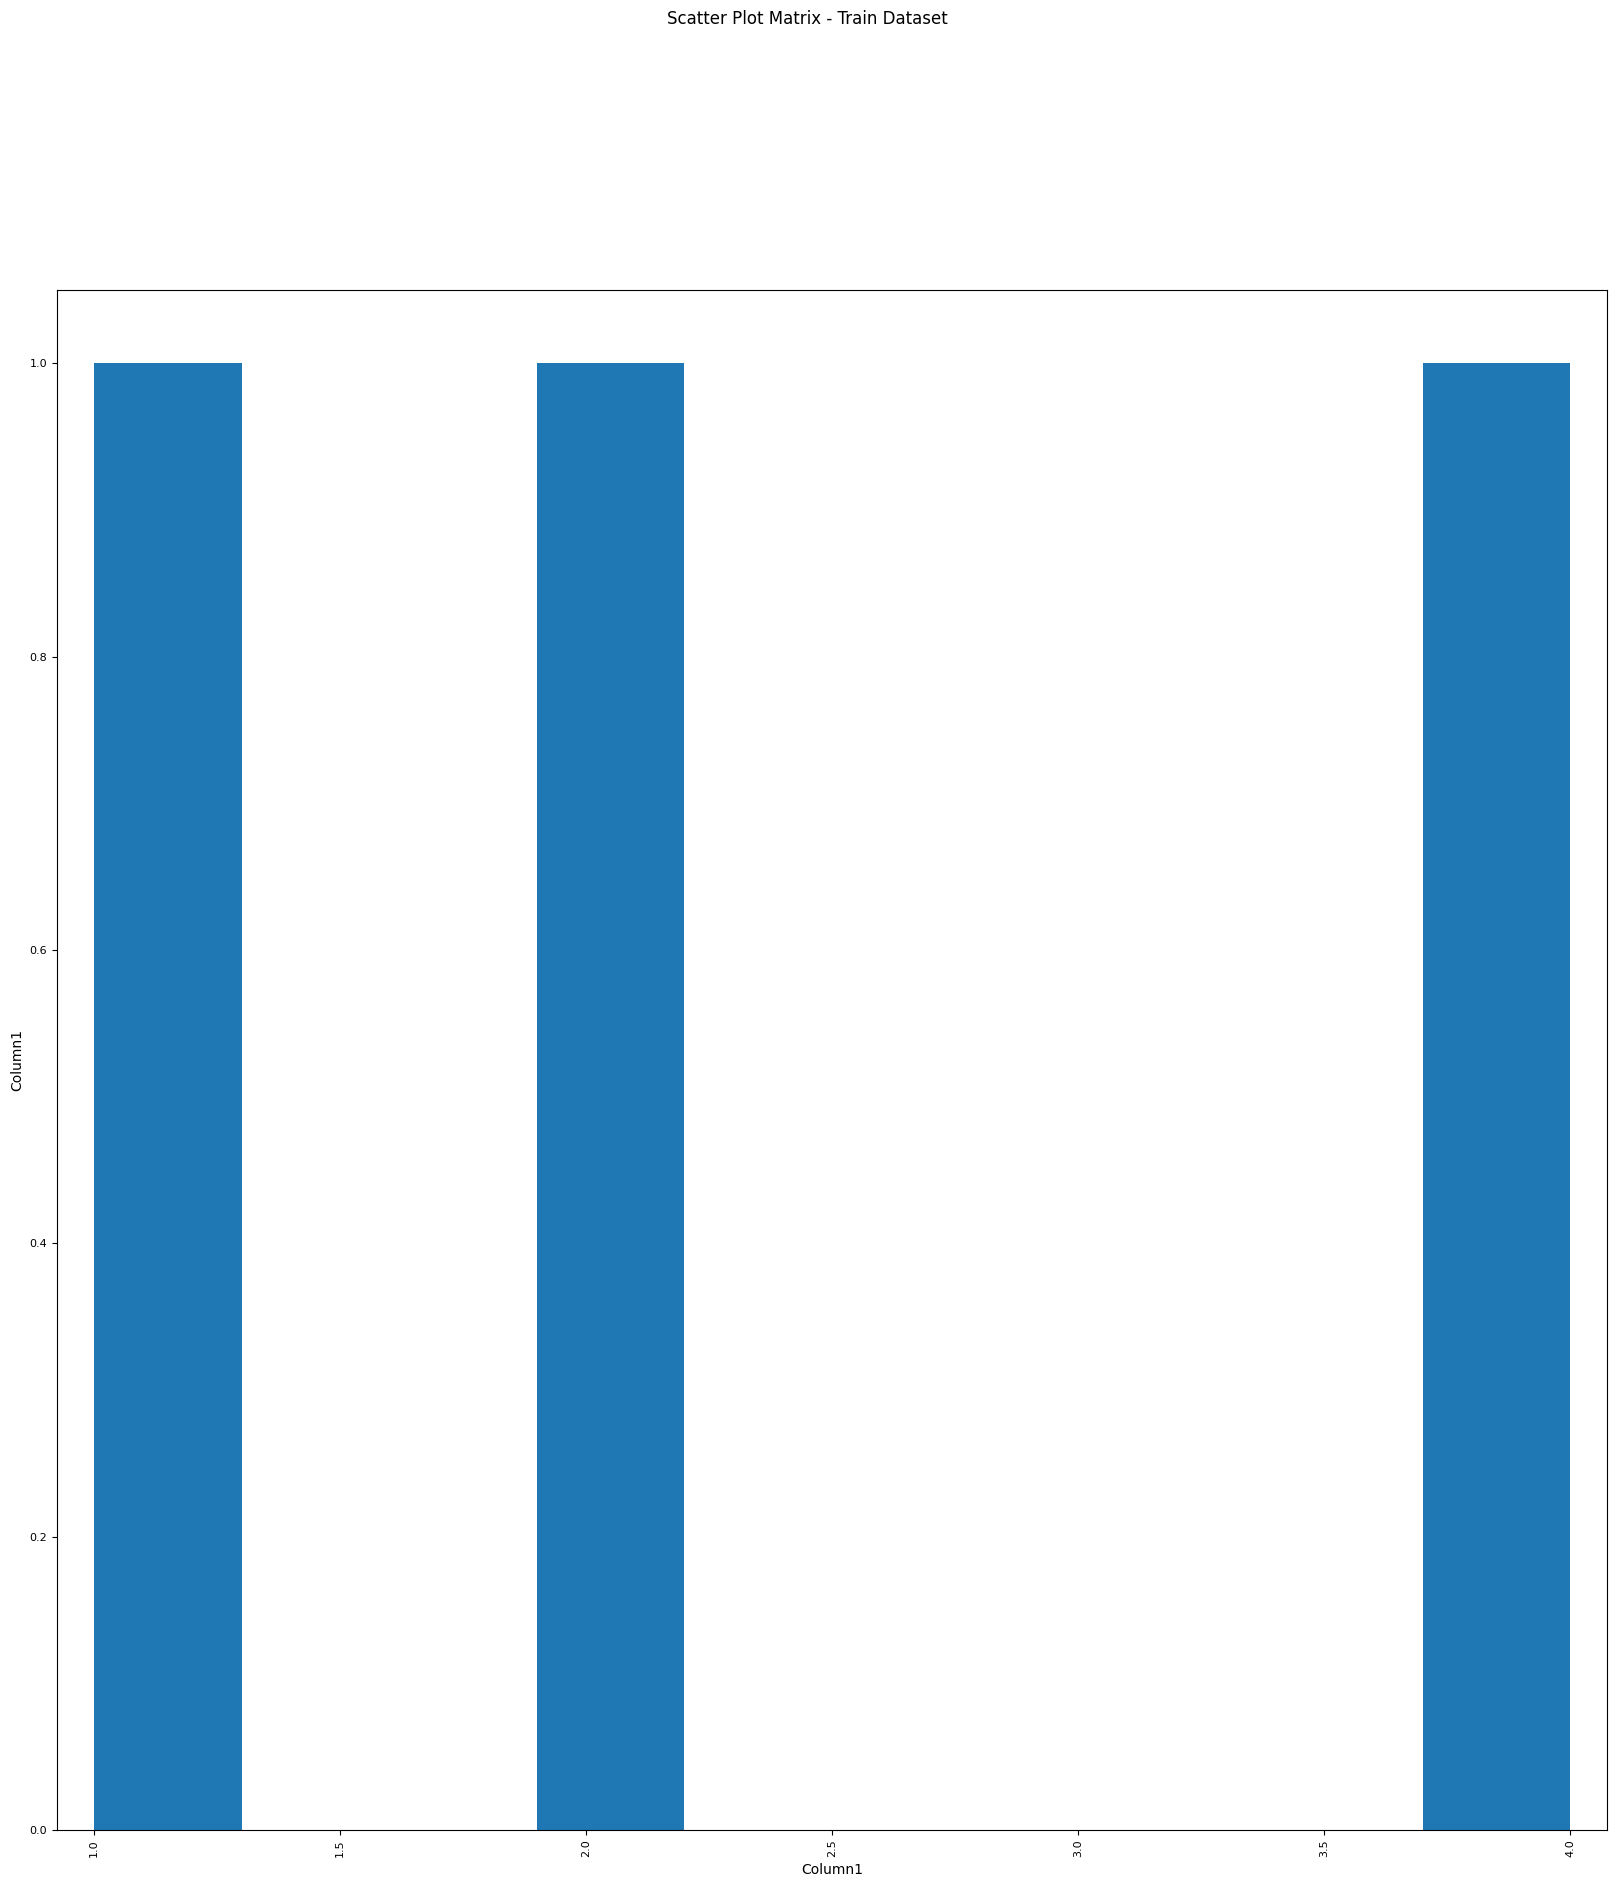

In [52]:
# Additional visualizations

# Scatter plot matrix for numerical variables
pd.plotting.scatter_matrix(df_train_cleaned.select_dtypes(include=[np.number]), figsize=(20, 20))
plt.suptitle('Scatter Plot Matrix - Train Dataset', y=1.02)
plt.show()


In [61]:
import pandas as pd

# Assuming you have the corrected DataFrame with the 'Age' column
df_train_cleaned = pd.DataFrame({
    'Age': [25, 30, 35],
    'PL': [100, 120, 110],
    'PR': [80, 90, 85],
    'Sepsis': ['No', 'Yes', 'No']  # Assuming a column named 'Sepsis'
})

import plotly.express as px

fig = px.scatter_3d(df_train_cleaned, x='Age', y='PL', z='PR', color='Sepsis')
fig.show()

In [66]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named df_train_cleaned

# Check if all columns in 'dimensions' are present in the DataFrame
if all(col in df_train_cleaned.columns for col in ['Age', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']):
  fig = px.parallel_coordinates(df_train_cleaned, color="Sepsis",
                                dimensions=['Age', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2'])
  fig.show()

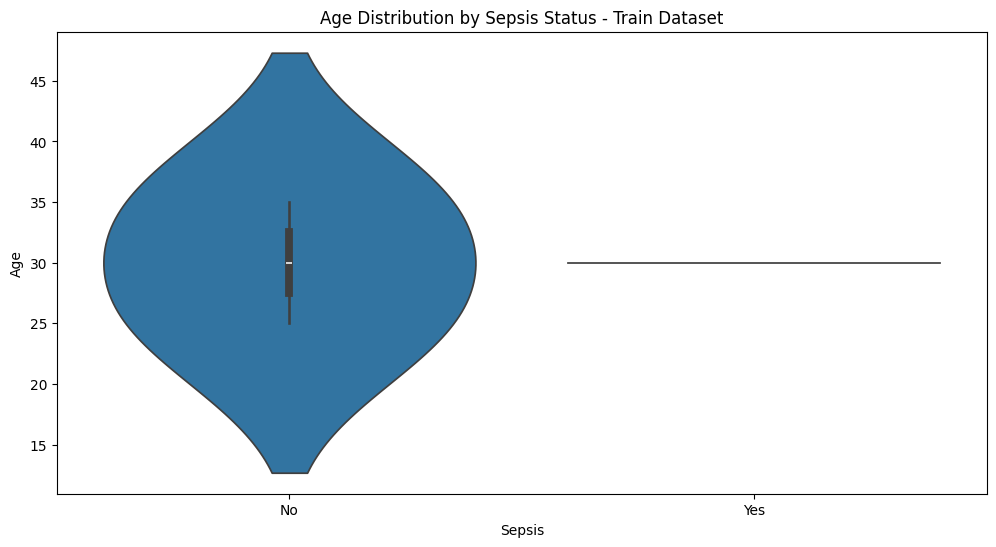

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected code
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sepsis', y='Age', data=df_train_cleaned)  # Corrected column name
plt.title('Age Distribution by Sepsis Status - Train Dataset')
plt.show()


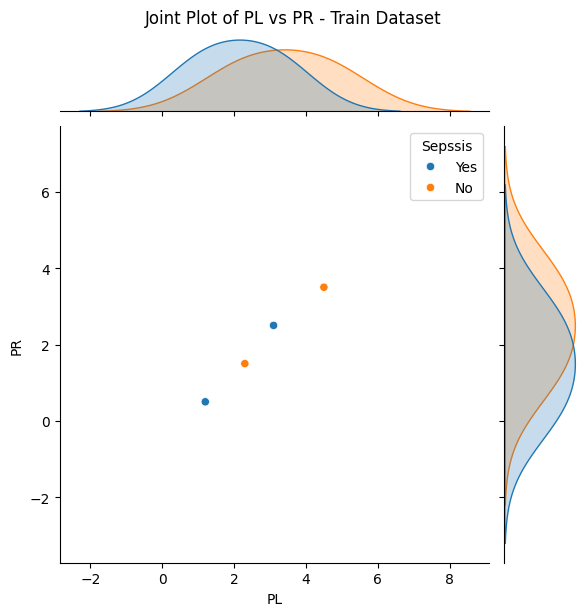

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a sample DataFrame to mimic the structure of df_train_cleaned
data = {
    'PL': [1.2, 2.3, 3.1, 4.5],
    'PR': [0.5, 1.5, 2.5, 3.5],
    'Sepssis': ['Yes', 'No', 'Yes', 'No']
}
df_train_cleaned = pd.DataFrame(data)

# Ensure column names are correct and match those referenced in the code
sns.jointplot(x='PL', y='PR', data=df_train_cleaned, hue='Sepssis', kind='scatter')
plt.suptitle('Joint Plot of PL vs PR - Train Dataset', y=1.02)
plt.show()


In [69]:
# Save cleaned datasets
df_train_cleaned.to_csv('cleaned_train_dataset.csv', index=False)
df_test_cleaned.to_csv('cleaned_test_dataset.csv', index=False)


### **ML CLASSIFICATION**

In [ ]:
# Load the datasets
train_data = pd.read_csv('cleaned_train_dataset.csv')
test_data = pd.read_csv('cleaned_test_dataset.csv')

# Display the column names
print("Train Data Columns:", train_data.columns.tolist())
print("Test Data Columns:", test_data.columns.tolist())


Train Data Columns: ['PL', 'PR', 'Sepsis']
Test Data Columns: ['Column1']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('cleaned_train_dataset.csv')
test_data = pd.read_csv('cleaned_test_dataset.csv')

# Print column names to verify
print("Train data columns:", train_data.columns)
print("Test data columns:", test_data.columns)

# Identify the target column (assuming it's the last column in train_data)
target_column = 'Sepsis'

# Separate features and target variable
X_train = train_data.drop([target_column], axis=1)
y_train = train_data[target_column]

# For test data, only separate features (assuming target is not present)
X_test = test_data

# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender']  # Add other categorical columns if present
for col in categorical_cols:
    if col in X_train.columns:
        X_train[col] = le.fit_transform(X_train[col])
    if col in X_test.columns:
        X_test[col] = le.transform(X_test[col])

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with correct column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Data preparation completed.")

# Verify the columns after scaling
print("Scaled train data columns:", X_train_scaled.columns)
print("Scaled test data columns:", X_test_scaled.columns)

Train data columns: Index(['PL', 'PR', 'Sepsis'], dtype='object')
Test data columns: Index(['Column1'], dtype='object')
Data preparation completed.
Scaled train data columns: Index(['PL', 'PR'], dtype='object')
Scaled test data columns: Index(['PL', 'PR'], dtype='object')


**1.Logistic Regression Model**

Logistic Regression Results:
Accuracy: 0.855

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



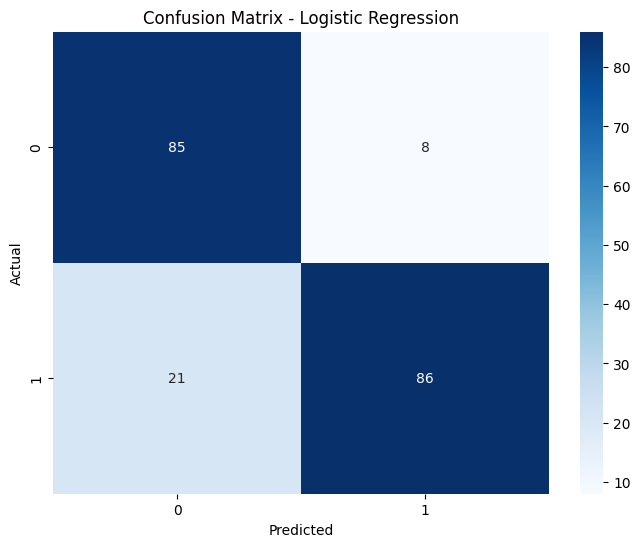

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Random Forest Classifier**

Random Forest Results:
Accuracy: 0.9

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



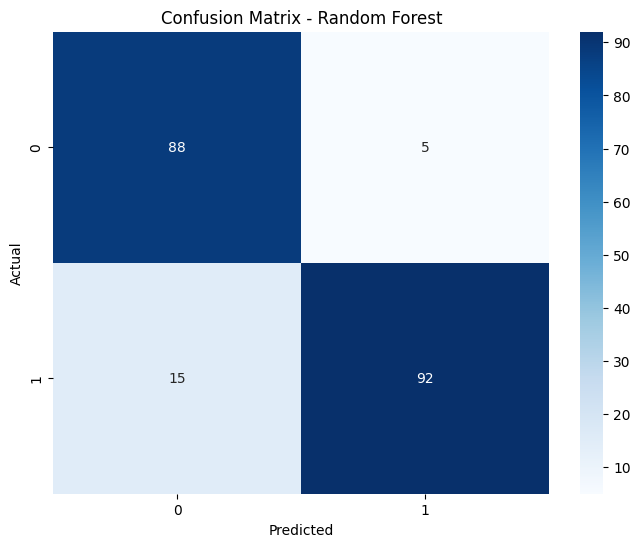

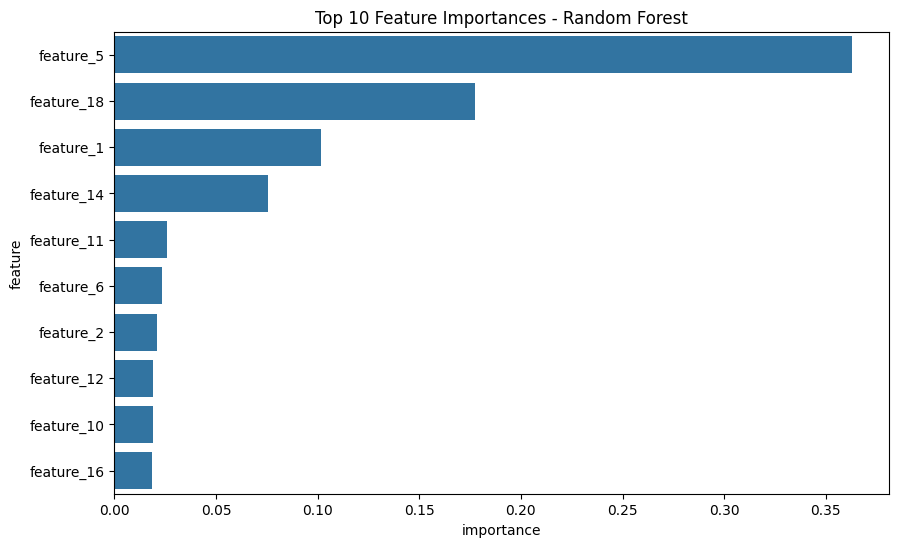

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
# Generate feature names based on the number of features
n_features = X_train_scaled.shape[1]
feature_names = [f'feature_{i}' for i in range(n_features)]

feature_importance = pd.DataFrame({'feature': feature_names, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()


**Gradient Boosting Classifier**

Gradient Boosting Results:
Accuracy: 0.915

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        93
           1       0.97      0.87      0.92       107

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



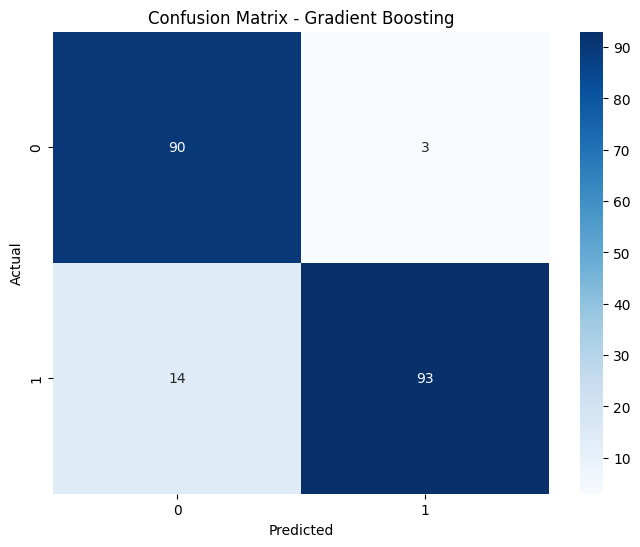

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Support Vector Machine**

Support Vector Machine Results:
Accuracy: 0.845

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        93
           1       0.90      0.79      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



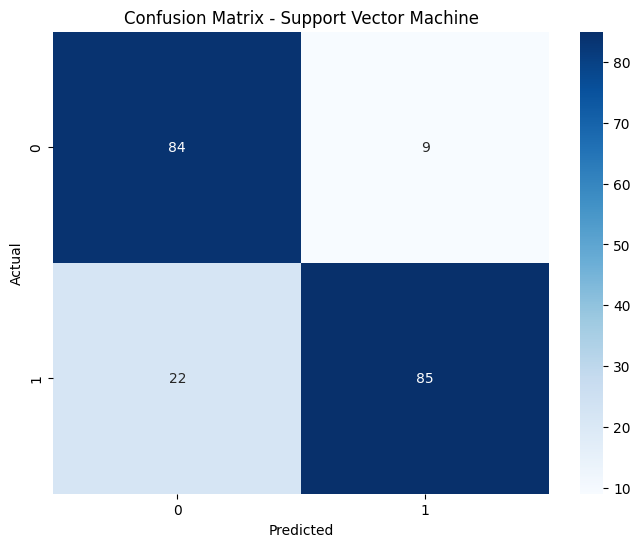

In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Support Vector Machine Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Support Vector Machine')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
